# Linear Regression Hand Implementation

## Fujiwara Daigo 6930-31-6255



## About The Data
I used "Energy efficiency Data Set" from UCI Machine Learning Repository ( https://archive.ics.uci.edu/ml/datasets/Energy+efficiency )

Explanation about the data is,


### Data Set Information:

"We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer."


and, this data's  feature values (or variable, attributes) is like that


### Attribute Information:

"The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses. "

"Specifically: 
X1	Relative Compactness 
X2	Surface Area 
X3	Wall Area 
X4	Roof Area 
X5	Overall Height 
X6	Orientation 
X7	Glazing Area 
X8	Glazing Area Distribution 
y1	Heating Load 
y2	Cooling Load"



## Purpose of The Report

 <span style="color: red; ">I used X1~X8 as observation value, and predict y1 and y2 from them by linear regression.</span>
    
this data set have 768 samples.
I use 80% of them for fitting, 20% of them varidation and test.

At first, I get the data as DataFrame object using pandas, and I will show  how the data is like.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
book = pd.ExcelFile("/Users/daigofujiwara/Documents/授業資料/パターン認識特論/ENB2012_data.xlsx")
df = book.parse("Sheet1", header=0)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


The data is just like this. Next I explain about Linear Regression with math and show the code.

# About Linear Regression

Using an input (feature) D-dimenssional vector sample
$$\boldsymbol{x}_i = ( x_1, x_2,...,x_D)^{\mathrm{T}}(i=1,\ldots,N)$$

General regression model is writen in,
$$y(x, w)=\sum_{j=0}^{M-1} \boldsymbol{w}_{j} \phi_{j}(x)=\boldsymbol{w}^{\top} \boldsymbol{\phi(x)}$$

where,
$$\boldsymbol{w}=\left(w_{0}, \ldots, w_{M-1}\right)^{\top}, \boldsymbol{\phi}=\left(\phi_{0}, . ., \phi_{M-1}\right)^{\mathrm{T}}, \text { and } \phi_{0}(\boldsymbol{x})=1$$

now, I  use $m$ dimessional <span style="color: red; "> polynomial basis function,</span> 
    so $\boldsymbol{\phi}(\boldsymbol{x})$ is that
    
$$\boldsymbol{\phi}=\left(1,x_1,x_1^2 ,\ldots, x_1^{m},x_2,\ldots,x_2^{m},x_3,\ldots,x_D^{m}\right)^{\top}$$

then, $M=D*m+1$

We want to select the model which minimizes Sum of Squared Error (SSE):
$$E_{D}(\boldsymbol{w})=\frac{1}{2} \sum_{n=1}^{N}\left\{t_{n}-\boldsymbol{w}^{\top} \boldsymbol{\phi}\left(\boldsymbol{x}_{n}\right)\right\}^{2}$$

the $\boldsymbol{w}_{ML}$ which minimize $E_D$ can be solved analytically, like this.
$$
\begin{aligned} w_{\mathrm{ML}} &=\underset{w}{\arg \min } \frac{1}{2} \sum_{n=1}^{N}\left\{t_{n}-\boldsymbol{w}^{\top} \boldsymbol{\phi}\left(\boldsymbol{x}_{n}\right)\right\}^{2} \\ 0 &=\nabla_\boldsymbol{w} E_D(\boldsymbol{w}) \\ &=\sum_{n=1}^{N}\left\{t_{n}-\boldsymbol{w}^{\top} \boldsymbol{\phi}\left(\boldsymbol{x}_{n}\right)\right\} \boldsymbol{\phi}\left(\boldsymbol{x}_{n}\right)^{\top} \\ \boldsymbol{w}_{\mathrm{ML}} &=\left(\boldsymbol{\Phi}^{\top} \boldsymbol{\Phi}\right)^{-1} \boldsymbol{\Phi}^{\top} \mathbf{t}=\boldsymbol{\Phi}^{\dagger} \mathbf{t} \end{aligned}
$$

So it can be numerically calculated, this is the code which calculates $\boldsymbol{w}_{ML}$  and make polynomial basis function.

In [3]:
class PolynomialBasisFunction:
    
    def __init__(self,m):
        self.m =  m#べき級数の次元
        
    def getphi(self,x):
        self.phi=np.ones(self.m*x.shape[0]+1)
        for i in range(x.shape[0]):
            for j in range (self.m):
                self.phi[i*self.m+j+1]= np.power(x[i], j+1)
                
        return self.phi
                
    def getm(self):
        return self.m

In [4]:
class LinearRegression:
    
    def __init__(self, basisFunction):
        self.basis = basisFunction
        self.w = "NULL"
        
    def fittingW(self, X, y):#引数は学習用データ
        #計画行列の初期化
        designMatrix = np.zeros((X.shape[0], X.shape[1]*self.basis.getm()+1))#X.shape=N:データ数, self.X.shape[1]*basis.getm+1=D*m+1:基底の次元
        
        for i in range (X.shape[0]):
            designMatrix[i] = self.basis.getphi(X[i])
            
        TransM = designMatrix.T
        MultiM=np.dot(TransM,designMatrix)
        InvM=np.linalg.inv(MultiM)
        
        psd_inv = np.dot(InvM, TransM)#擬似逆行列
        
        self.w = np.dot(psd_inv,y)
        return self.w
        
    def predictY(self, X):#引数はテスト用データ
        #計画行列の初期化
        designMatrix = np.zeros((X.shape[0], X.shape[1]*self.basis.getm()+1))#X.shape=N:データ数, self.X.shape[1]*basis.getm+1=D*m+1:基底の次元
        
        for i in range(X.shape[0]):
            designMatrix[i] = self.basis.getphi(X[i])
            
        if self.w == "NULL":
            print("haven't optimized !!")
        
        else:
            y=np.dot(designMatrix, self.w)
            return y
        

## Analysis and Experiment
Using these classess, I tried regression according to dimenssion parameter $m=1$, and $m=2$ . After that I will compare them.  

### Analysis and Experiment(m=1)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
#dataのnp.arrayとしての取り出し
X = df[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]].values
Y = df[["Y1","Y2"]].values

# 標準化
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(Y)

In [7]:


# 学習用データとテスト用データに分割
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y_std, test_size=0.2, random_state=0)

#basisFunction
basisFunction=PolynomialBasisFunction(1)

# regression model 
regressionModel = LinearRegression(basisFunction)
regressionModel.fittingW(X_train, Y_train)

array([[-5.42855754e-03,  1.03261296e-03],
       [-1.09129452e+00, -1.19242699e+00],
       [-1.96446300e+00, -2.21293803e+00],
       [ 7.44193409e-01,  7.89699221e-01],
       [ 9.43914197e-01,  1.18071216e+00],
       [ 7.03358957e-01,  7.94908129e-01],
       [-2.31683218e-03,  1.68597622e-02],
       [ 2.61549551e-01,  2.10993165e-01],
       [ 2.45409712e-02,  3.87468965e-03]])

this is the optimaized weight $\boldsymbol{w}_{ML}$.
The left colm  is for $y1$, and the other is for $y2$. 

In [8]:
# predicting
Y_train_pred = regressionModel.predictY(X_train)
Y_test_pred = regressionModel.predictY(X_test)

#標準化を戻す
temp=sc_y
Y_train = sc_y.inverse_transform(Y_train)
sc_y=temp
Y_test = sc_y.inverse_transform(Y_test)
sc_y=temp
Y_train_pred = sc_y.inverse_transform(Y_train_pred)
sc_y=temp
Y_test_pred = sc_y.inverse_transform(Y_test_pred)


y1_train=(Y_train.T[0]).T
y2_train=(Y_train.T[1]).T
y1_test=(Y_test.T[0]).T
y2_test=(Y_test.T[1]).T
y1_train_pred=(Y_train_pred.T[0]).T
y2_train_pred=(Y_train_pred.T[1]).T
y1_test_pred=(Y_test_pred.T[0]).T
y2_test_pred=(Y_test_pred.T[1]).T

### Evaluation

I taked visual evaluation to the accuracy of prediction and quantitative analysis . I will show the plot.
As a quantittative analysis, I used Mean Squared Error (MSE).
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - \hat{y^{(i)}})$$

#### y1

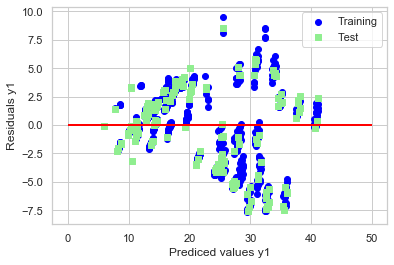

In [9]:
sns.set(style="whitegrid", context="notebook")
plt.scatter(y1_train_pred, y1_train_pred - y1_train,
            c="blue", marker="o", label="Training")
plt.scatter(y1_test_pred, y1_test_pred - y1_test,
            c="lightgreen", marker="s", label="Test")
plt.xlabel("Prediced values y1")
plt.ylabel("Residuals y1")
plt.legend()
plt.hlines(y=0, xmin=0, xmax=50, lw=2, color="red")
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error as mse

print("MSE train: %.3f, test: %.3f" % (mse(y1_train, y1_train_pred), mse(y1_test, y1_test_pred)))

MSE train: 10.724, test: 12.517


#### y2

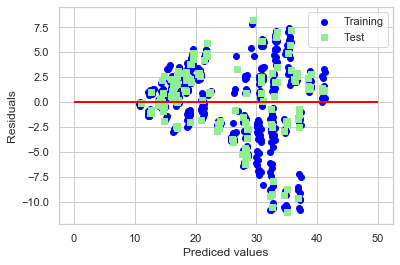

In [11]:
sns.set(style="whitegrid", context="notebook")
plt.scatter(y2_train_pred, y2_train_pred - y2_train,
            c="blue", marker="o", label="Training")
plt.scatter(y2_test_pred, y2_test_pred - y2_test,
            c="lightgreen", marker="s", label="Test")
plt.xlabel("Prediced values")
plt.ylabel("Residuals")
plt.legend()
plt.hlines(y=0, xmin=0,xmax=50, lw=2, color="red")
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error as mse

print("MSE train: %.3f, test: %.3f" % (mse(y2_train, y2_train_pred), mse(y2_test, y2_test_pred)))

MSE train: 12.389, test: 13.452


### Analysis and Expwriment(m=2)
Next,I try basis function's parameter m=2.

In [13]:
#dataのnp.arrayとしての取り出し
X = df[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]].values
Y = df[["Y1","Y2"]].values

# 標準化
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(Y)

# 学習用データとテスト用データに分割
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y_std, test_size=0.2, random_state=0)

#basisFunction
basisFunction=PolynomialBasisFunction(2)

# regression model 
regressionModel = LinearRegression(basisFunction)
regressionModel.fittingW(X_train, Y_train)

# predicting
Y_train_pred = regressionModel.predictY(X_train)
Y_test_pred = regressionModel.predictY(X_test)

#標準化を戻す
temp=sc_y
Y_train = sc_y.inverse_transform(Y_train)
sc_y=temp
Y_test = sc_y.inverse_transform(Y_test)
sc_y=temp
Y_train_pred = sc_y.inverse_transform(Y_train_pred)
sc_y=temp
Y_test_pred = sc_y.inverse_transform(Y_test_pred)


y1_train=(Y_train.T[0]).T
y2_train=(Y_train.T[1]).T
y1_test=(Y_test.T[0]).T
y2_test=(Y_test.T[1]).T
y1_train_pred=(Y_train_pred.T[0]).T
y2_train_pred=(Y_train_pred.T[1]).T
y1_test_pred=(Y_test_pred.T[0]).T
y2_test_pred=(Y_test_pred.T[1]).T

LinAlgError: Singular matrix

#### y1

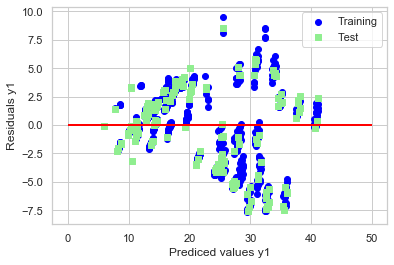

In [14]:
sns.set(style="whitegrid", context="notebook")
plt.scatter(y1_train_pred, y1_train_pred - y1_train,
            c="blue", marker="o", label="Training")
plt.scatter(y1_test_pred, y1_test_pred - y1_test,
            c="lightgreen", marker="s", label="Test")
plt.xlabel("Prediced values y1")
plt.ylabel("Residuals y1")
plt.legend()
plt.hlines(y=0, xmin=0, xmax=50, lw=2, color="red")
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error as mse

print("MSE train: %.3f, test: %.3f" % (mse(y1_train, y1_train_pred), mse(y1_test, y1_test_pred)))

MSE train: 10.724, test: 12.517


### y2

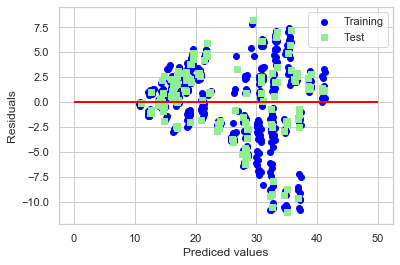

In [16]:
sns.set(style="whitegrid", context="notebook")
plt.scatter(y2_train_pred, y2_train_pred - y2_train,
            c="blue", marker="o", label="Training")
plt.scatter(y2_test_pred, y2_test_pred - y2_test,
            c="lightgreen", marker="s", label="Test")
plt.xlabel("Prediced values")
plt.ylabel("Residuals")
plt.legend()
plt.hlines(y=0, xmin=0,xmax=50, lw=2, color="red")
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error as mse

print("MSE train: %.3f, test: %.3f" % (mse(y2_train, y2_train_pred), mse(y2_test, y2_test_pred)))

MSE train: 12.389, test: 13.452


## coment
According to MSE data below, clearly m=1 model is better than m=2 one. It may be caused by overfitting, because the number of data is relatively few, and as m get bigger, the complexity of this model (the dimenssion of basis function : M) increase drasticaly. 

m=1   
MSE train: 8.415, test: 10.822

m=2  
MSE train: 141073366089532411215872.000, test: 156393509577783081172992.000

## Additional Research : Gaussian Basis Function
I try to change basis function polynominal to Gaussian.
Newly we define GaussianBasisFunction class.
This research is for only y1.
Now, I  use $m$ dimessional <span style="color: red; "> Gaussian basis function,</span> 
    so $\boldsymbol{\phi}(\boldsymbol{x})$ is that
    
$$\boldsymbol{\phi}=\left(1,\phi_{1,1},\phi_{1,2} ,\ldots, \phi_{1,m},\phi_{2,1},\ldots,\phi_{2,m},\phi_{3,1},\ldots,x_{D,m}\right)^{\top}$$

where
$${\phi}_{i,j}=\exp \left[-\frac{\left(x_i-\mu_{j}\right)^{2}}{2 s^{2}}\right]$$

In [18]:
class GaussianBasisFunction:
    def __init__(self,m):
        self.s2=1
        self.m=m
        
    def getphi(self,x):
        mu=np.arange(self.m)
        mu=mu/self.m
        self.phi=np.ones(self.m*x.shape[0]+1)
        for i in range(x.shape[0]):
            for j in range (self.m):
                self.phi[i*self.m+j+1]= np.exp(-(x[i]-mu[j])*(x[i]-mu[j])/(2*self.s2))
                
        return self.phi
    
    def getm(self):
        return self.m

### m=3, y1

In [19]:
#dataのnp.arrayとしての取り出し
X = df[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]].values
Y = df[["Y1","Y2"]].values

# 標準化
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
Y_std = sc_y.fit_transform(Y)

# 学習用データとテスト用データに分割
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y_std, test_size=0.2, random_state=0)

#basisFunction
basisFunction=GaussianBasisFunction(3)

# regression model 
regressionModel = LinearRegression(basisFunction)
regressionModel.fittingW(X_train, Y_train)

# predicting
Y_train_pred = regressionModel.predictY(X_train)
Y_test_pred = regressionModel.predictY(X_test)

#標準化を戻す
temp=sc_y
Y_train = sc_y.inverse_transform(Y_train)
sc_y=temp
Y_test = sc_y.inverse_transform(Y_test)
sc_y=temp
Y_train_pred = sc_y.inverse_transform(Y_train_pred)
sc_y=temp
Y_test_pred = sc_y.inverse_transform(Y_test_pred)


y1_train=(Y_train.T[0]).T

y1_test=(Y_test.T[0]).T

y1_train_pred=(Y_train_pred.T[0]).T

y1_test_pred=(Y_test_pred.T[0]).T


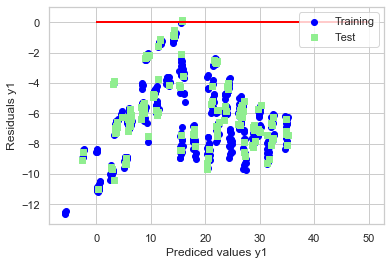

In [20]:
sns.set(style="whitegrid", context="notebook")
plt.scatter(y1_train_pred, y1_train_pred - y1_train,
            c="blue", marker="o", label="Training")
plt.scatter(y1_test_pred, y1_test_pred - y1_test,
            c="lightgreen", marker="s", label="Test")
plt.xlabel("Prediced values y1")
plt.ylabel("Residuals y1")
plt.legend()
plt.hlines(y=0, xmin=0, xmax=50, lw=2, color="red")
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error as mse

print("MSE train: %.3f, test: %.3f" % (mse(y1_train, y1_train_pred), mse(y1_test, y1_test_pred)))

MSE train: 44.009, test: 41.348


### coment
Seeing the result, regression by Gaussian basis function exceeds any polynomial regression so far.

### Change of MSE for m
I visualize the changing of MSE as the parameter m (complexity of model) increases.



In [22]:
M = 20# max model complexity to search
mse_train = []
mse_test = []

for m in range(M):
    X = df[["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]].values
    Y = df[["Y1","Y2"]].values
    
    # 標準化
    sc_x = StandardScaler()
    sc_y = StandardScaler()
    X_std = sc_x.fit_transform(X)
    Y_std = sc_y.fit_transform(Y)

    # 学習用データとテスト用データに分割
    X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y_std, test_size=0.2, random_state=0)

    #basisFunction
    basisFunction=GaussianBasisFunction(m)

    # regression model 
    regressionModel = LinearRegression(basisFunction)
    regressionModel.fittingW(X_train, Y_train)

    # predicting
    Y_train_pred = regressionModel.predictY(X_train)
    Y_test_pred = regressionModel.predictY(X_test)

    #標準化を戻す
    temp=sc_y
    Y_train = sc_y.inverse_transform(Y_train)
    sc_y=temp
    Y_test = sc_y.inverse_transform(Y_test)
    sc_y=temp
    Y_train_pred = sc_y.inverse_transform(Y_train_pred)
    sc_y=temp
    Y_test_pred = sc_y.inverse_transform(Y_test_pred)
    
    y1_train=(Y_train.T[0]).T
   
    y1_test=(Y_test.T[0]).T
    
    y1_train_pred=(Y_train_pred.T[0]).T
    
    y1_test_pred=(Y_test_pred.T[0]).T
    
    
    # the MSE is recoded
    mse_train.append(mse(y1_train, y1_train_pred))
    mse_test.append(mse(y1_test, y1_test_pred))
    
    

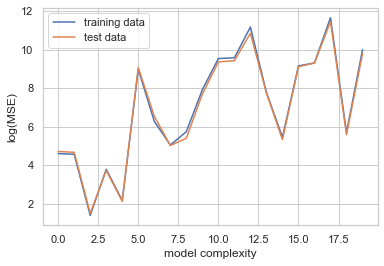

In [23]:
fig = plt.figure()
ax =fig.add_subplot(111)
ax.plot(range(len(mse_train)), np.log(mse_train), label="training data")
ax.plot(range(len(mse_test)), np.log(mse_test), label="test data")
ax.set_xlabel("model complexity")
ax.set_ylabel("log(MSE)")
plt.legend()
plt.show()

## Conclusion
This graph and these researches shows that complexity sometimes make regression model worse, and a model have the best degree of complexity for its own.
It can be also said that, in linear regression model, according to the data treationg, its accuracy depends so much on basis function.